In [2]:
# Import necessory libraries 
import numpy as np
import pandas as pd
import pickle
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import seaborn as sns 

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfuly! ")

All libraries imported successfuly! 


In [3]:
# Data Loading 
# We will use the california Housing dataset, whaich is a classic dataset for regression tasks. it contains information 
# about houses in California, including their prices, square footage, number of bedrooms and bathrooms, etc
housing = fetch_california_housing(as_frame=True)
x = housing.data
y = housing.target

print("Dataset Loaded Successfully!")
print(f"Features (x) shapr: {x.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nDatasets description: ")
print(housing.DESCR[:500]+ "......")


Dataset Loaded Successfully!
Features (x) shapr: (20640, 8)
Target (y) shape: (20640,)

Datasets description: 
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu......


In [4]:
# Display basic information about the dataset
print("Features name: ")
print(x.columns.tolist())
print("\nFirst 5 rows of features (x): ")
print(x.head())
print("\nFirst 5 rows of target (y): ")
print(y.head())
print("\nBasic Statistics: ")
print(x.describe())

Features name: 
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First 5 rows of features (x): 
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

First 5 rows of target (y): 
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Basic Statistics: 
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     

In [6]:
# Data Exploration and Visualization 
# Lets explore the data and visualize it to understand the distribution of the data
# Check for missing values
print("Missing values in features: ")
print(x.isnull().sum())
print(f"\\nMissing values in target: {y.isnull().sum()}")

# Basic statistics of the data
print("\nTarget variable statistics: ")
print(f"Mean house value : ${y.mean():.2f} (in thousands of thousands)")
print(f"Median house value : ${y.median():.2f} (in thousands of thousands")
print(f"Min house value: ${y.min():.2f} (in thousands of thousands)")
print(f"Max house value: ${y.max():.2f} (in thousands of thousands")


Missing values in features: 
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
\nMissing values in target: 0

Target variable statistics: 
Mean house value : $2.07 (in thousands of thousands)
Median house value : $1.80 (in thousands of thousands
Min house value: $0.15 (in thousands of thousands)
Max house value: $5.00 (in thousands of thousands


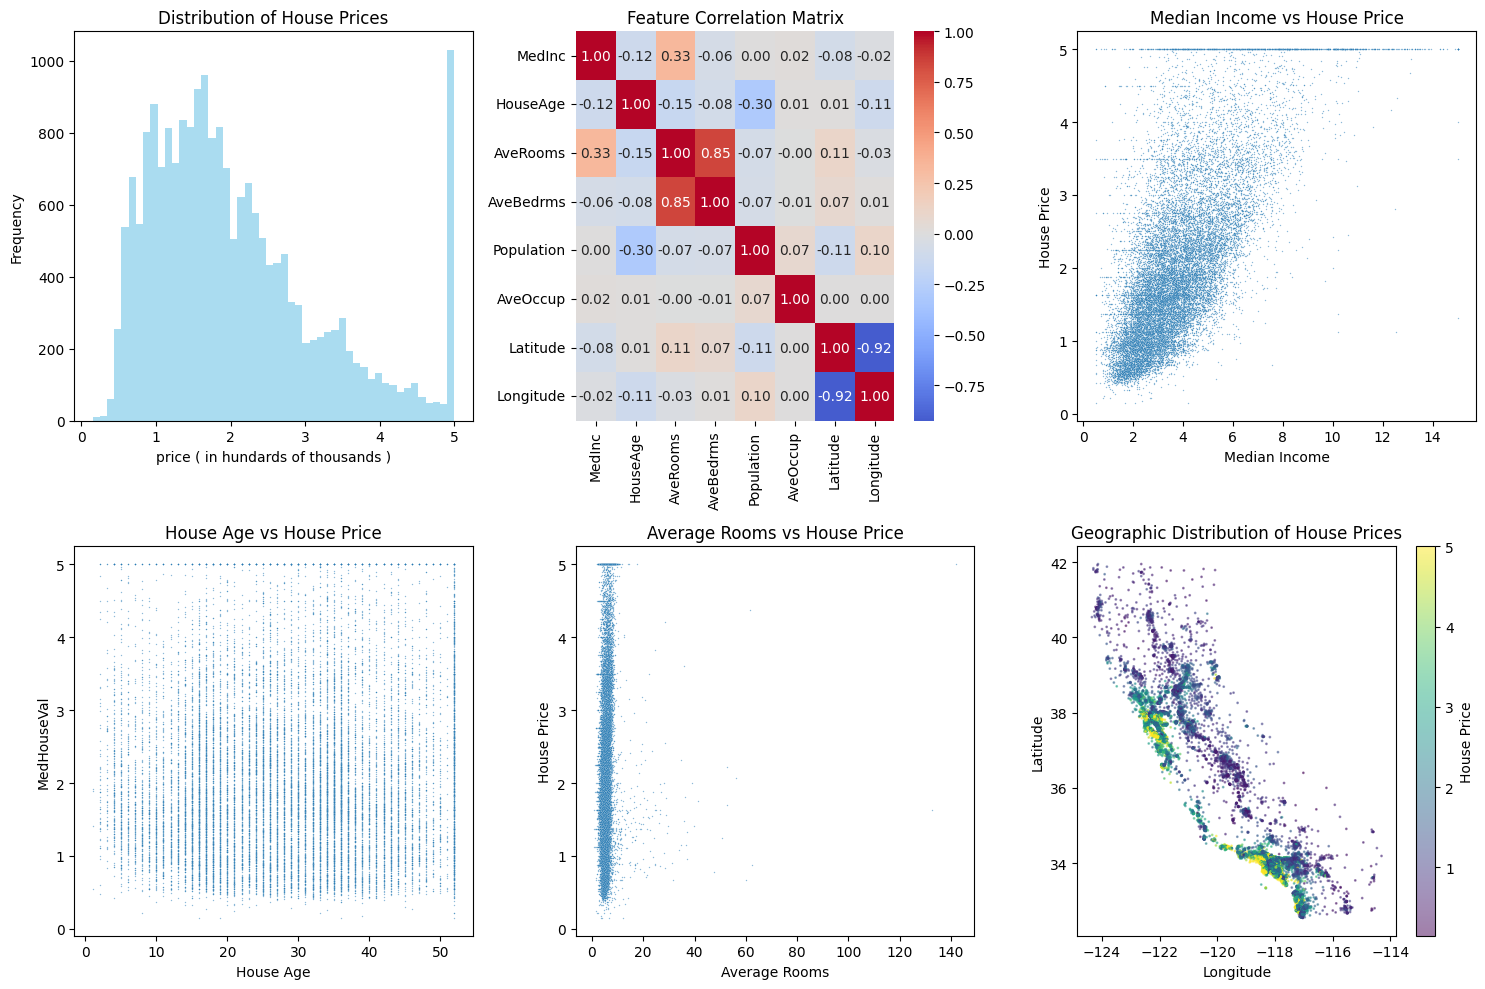

In [13]:
# Create visualization 
plt.figure(figsize = (15, 10 ))

# Distribution of target Varialble
plt.subplot(2, 3, 1)
plt.hist(y, bins = 50, alpha = 0.7, color = 'skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('price ( in hundards of thousands )')
plt.ylabel('Frequency')

# Correlation heatmap 
plt.subplot(2, 3, 2)
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center= 0, fmt = '.2f')
plt.title('Feature Correlation Matrix')

# Scatter plot: MedInc vs price 
plt.subplot(2, 3, 3)
sns.scatterplot(x=x['MedInc'], y=y, alpha = 0.5, s= 1)
plt.title('Median Income vs House Price')
plt.xlabel('Median Income')
plt.ylabel('House Price')

# Scatter Plot: HouseAge vs Price 
plt.subplot(2,3,4)
sns.scatterplot(x = x['HouseAge'], y=y, alpha = 0.5, s = 1)
plt.title('House Age vs House Price')
plt.xlabel('House Age')

# Scatter Plot: AveRooms vs Price
plt.subplot(2,3,5)
sns.scatterplot(x=x['AveRooms'], y=y, alpha = 0.5, s=1)
plt.title('Average Rooms vs House Price')
plt.xlabel('Average Rooms')
plt.ylabel('House Price')

# Geographic plot 
plt.subplot(2, 3, 6)
scatter = plt.scatter(x['Longitude'], x['Latitude'], c=y, cmap='viridis', alpha=0.5, s=1)
plt.colorbar(scatter, label='House Price')
plt.title('Geographic Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()



In [17]:
# Data Preprocessing and Cleaning
# in this section we will perform data preprocessing, which includes splitting the data into training and
# testing sets (80% training, 20% testing) and scaling features.

# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle= True)

print("Data split Completed")
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"\nTraining set: {len(x_train)} samples ({len(x_train)/len(x)*100:.1f}%)")
print(f"Testing set: {len(x_test)} samples ({len(x_test)/len(x)*100:.1f}%")


Data split Completed
x_train shape: (16512, 8)
x_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)

Training set: 16512 samples (80.0%)
Testing set: 4128 samples (20.0%


In [26]:
# Scale the feature using StandarScaler
import numpy as np
# This is important for linear regression to ensure all features contribute equally
scaler = StandardScaler()
# Fit the scaler on training data and tranform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("Features scaling Completed! ")
print(f"\nOrginal x_train Statistics:")
print(f"Mean: {x_train.mean().mean():.3f}")
print(f"Standard Deviation: {x_train.std().mean():.3f}")

print(f"\nScaled x_train Statistics:")
print(f"Mean: {x_train_scaled.mean().mean():.3f}")
print(f"Standard Deviation: {x_train_scaled.std().mean():.3f}")

print("\nFirst 5 rows of Scaled x_train: ")
print(x_train_scaled[:5])


Features scaling Completed! 

Orginal x_train Statistics:
Mean: 173.079
Standard Deviation: 146.263

Scaled x_train Statistics:
Mean: 0.000
Standard Deviation: 1.000

First 5 rows of Scaled x_train: 
[[-0.326196    0.34849025 -0.17491646 -0.20836543  0.76827628  0.05137609
  -1.3728112   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 -0.12853018 -0.09890135 -0.11736222
  -0.87669601  0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 -0.25753771 -0.44981806 -0.03227969
  -0.46014647 -0.44760309]
 [-1.01786438  0.58654547 -0.60001532 -0.14515634 -0.00743434  0.07750687
  -1.38217186  1.23269811]
 [-0.17148831  1.14200767  0.3490073   0.08662432 -0.48587717 -0.06883176
   0.5320839  -0.10855122]]


In [ ]:
#Model Training 
#We well train a linear regression model from scikit-learn. Linear 